In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
df = pd.read_csv("bike_details_csv.csv")
df.head()


Unnamed: 0     id                                       title          serial manufacturer_name                frame_model  year                                              thumb                                          large_img is_stock_img stolen      stolen_location          date_stolen registration_created_at registration_updated_at                                url                                   api_url  manufacturer_id paint_description name frame_size  \
0           0  50088                             Schwinn Gateway          absent           Schwinn                    Gateway   NaN                                                NaN                                                NaN        False  False                  NaN  1970-01-01 00:00:00     2015-07-06 22:27:01     2015-11-03 05:36:54  https://bikeindex.org/bikes/50088  https://bikeindex.org/api/v1/bikes/50088              117               NaN  NaN        NaN   
1           1  60140          2016 Specialized Diverge Elite DSW  WSBC601010269K       Specialized          Diverge Elite DSW  2016                                                NaN                                                NaN        False  False                  NaN  1970-01-01 00:00:00     2015-10-08 19:18:50     2015-11-03 05:34:30  https://bikeindex.org/bikes/60140  https://bikeindex.org/api/v1/bikes/60140              307               NaN  NaN       52cm   
2           2  44884  2016 Specialized '15 Crosstrail Sport Disc  WSBC606249640J       Specialized  '15 Crosstrail Sport Disc  2016                                                NaN                                                NaN        False  False                  NaN  1970-01-01 00:00:00     2015-05-08 00:30:25     2015-11-03 05:32:55  https://bikeindex.org/bikes/44884  https://bikeindex.org/api/v1/bikes/44884              307      Blk/Char/Red  NaN         xl   
3           3  11542                              2013 Trek 4300    WTU124C5170G              Trek                       4300  2013                                                NaN                                                NaN        False   True  San Jose, CA, 95126  2013-06-10 06:00:00     2013-08-20 06:00:00     2015-11-03 05:11:14  https://bikeindex.org/bikes/11542  https://bikeindex.org/api/v1/bikes/11542               47               NaN  NaN        NaN   
4           4  13359                         2010 Schwinn Katana          absent           Schwinn                     Katana  2010  https://files.bikeindex.org/uploads/Pu/4903/sm...  https://files.bikeindex.org/uploads/Pu/4903/la...        False   True  Sandusky, OH, 44870  2010-07-10 06:00:00     2010-07-11 06:00:00     2015-11-03 05:17:53  https://bikeindex.org/bikes/13359  https://bikeindex.org/api/v1/bikes/13359              117               NaN  NaN       58cm   

                                         description rear_tire_narrow front_tire_narrow type_of_cycle test_bike  rear_wheel_size_iso_bsd  front_wheel_size_iso_bsd handlebar_type_slug frame_material_slug front_gear_type_slug rear_gear_type_slug  stolen_id  s_date_stolen           s_location   latitude   longitude          theft_description locking_description lock_defeat_description police_report_number police_report_department     s_rec_created_at create_open311  \
0                                                NaN             True               NaN          Bike     False                      NaN                       NaN                 NaN                 NaN                  NaN                 NaN        NaN            NaN                  NaN        NaN         NaN                        NaN                 NaN                     NaN                  NaN                      NaN  1970-01-01 00:00:00            NaN   
1                                                NaN             True               NaN          Bike     False                      NaN                       NaN                 NaN            aluminum          

In [3]:
df.shape

(59619, 57)

In [4]:
df.columns

Index([u'Unnamed: 0', u'id', u'title', u'serial', u'manufacturer_name', u'frame_model', u'year', u'thumb', u'large_img', u'is_stock_img', u'stolen', u'stolen_location', u'date_stolen', u'registration_created_at', u'registration_updated_at', u'url', u'api_url', u'manufacturer_id', u'paint_description', u'name', u'frame_size', u'description', u'rear_tire_narrow', u'front_tire_narrow', u'type_of_cycle', u'test_bike', u'rear_wheel_size_iso_bsd', u'front_wheel_size_iso_bsd', u'handlebar_type_slug',
       u'frame_material_slug', u'front_gear_type_slug', u'rear_gear_type_slug', u'stolen_id', u's_date_stolen', u's_location', u'latitude', u'longitude', u'theft_description', u'locking_description', u'lock_defeat_description', u'police_report_number', u'police_report_department', u's_rec_created_at', u'create_open311', u'sder_formatted_address', u'sder_street_number', u'sder_route', u'sder_postal_code', u'sder_neighborhood', u'sder_city', u'sder_county', u'sder_state', u'sder_country',
       u'

In [5]:
#http://stackoverflow.com/questions/16010869/python-plot-a-bar-using-matplotlib-using-a-dictionary
#http://stackoverflow.com/questions/7197315/5-maximum-values-in-a-python-dictionary
#http://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib

import matplotlib.pyplot as plt
import operator
from matplotlib.pyplot import cm 

def plotDictionary(D, topN = -1 , ax = None , c = 'g' , columnName = None , labelRotation = 60):
    
    if ax is None:
        fig , (ax) = plt.subplots( nrows = 1 , ncols = 1 ,figsize=(14,5) )
    
    if topN != -1:
        D = (sorted(D.iteritems(), key=operator.itemgetter(1), reverse=True)[:topN])
    
    ax.bar(range(len(D)), [ item[1] for item in D], align='center' , alpha = 0.2, color = c)
    ax.set_xticks(range(len(D)))
    ax.set_title(columnName)
    ax.set_xticklabels( [ str(item[0]).decode('utf-8')[:20] for item in D] , rotation = labelRotation )
    return ax


/home/anusha/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


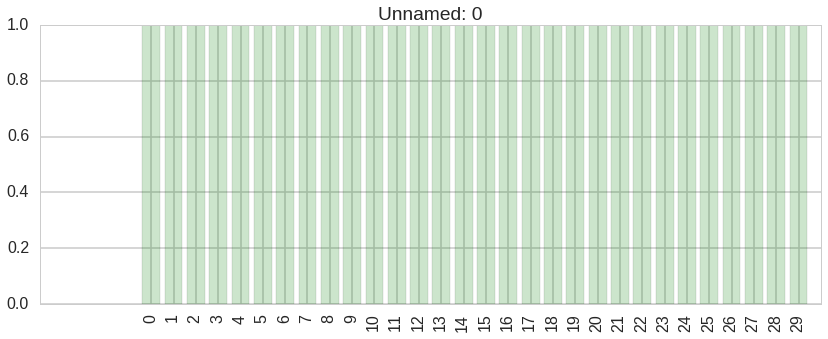

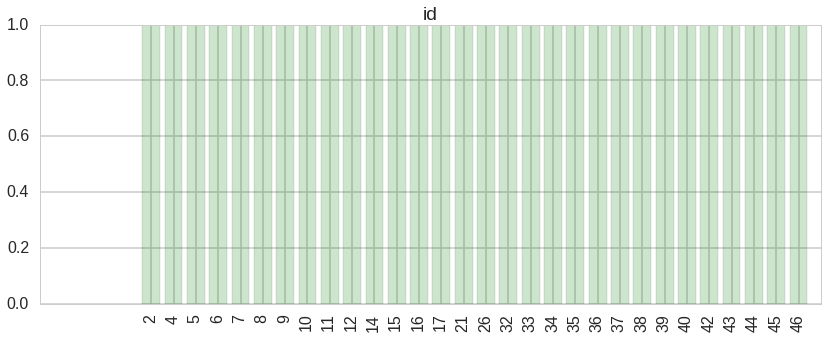

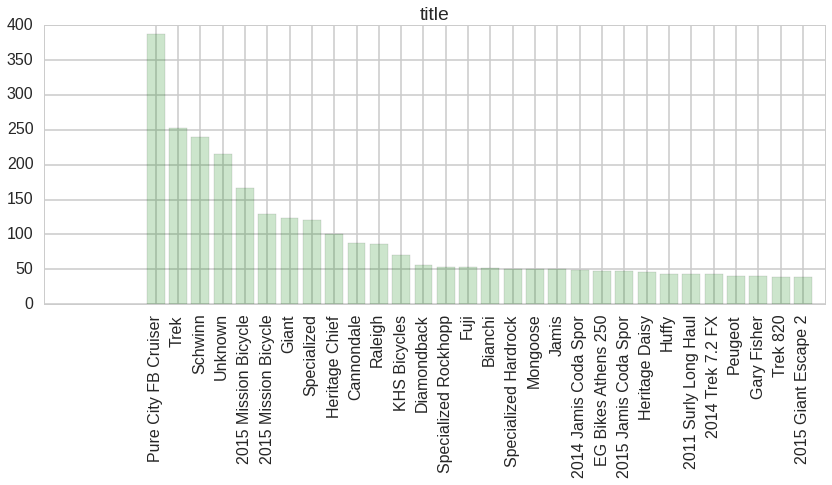

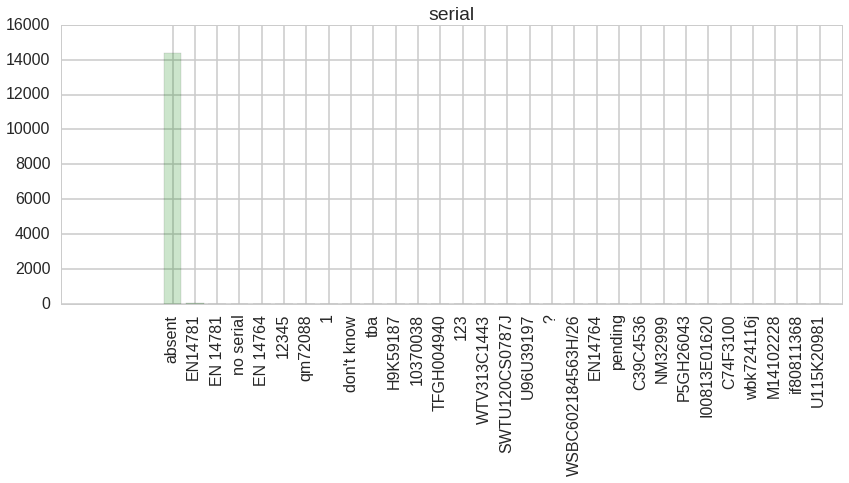

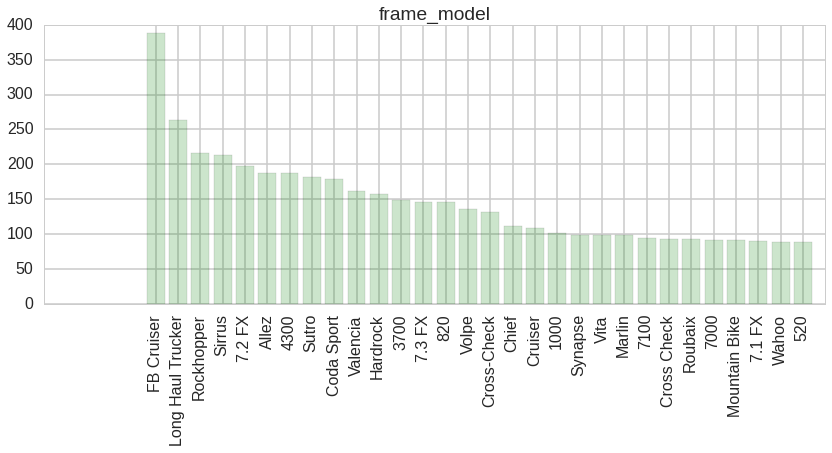

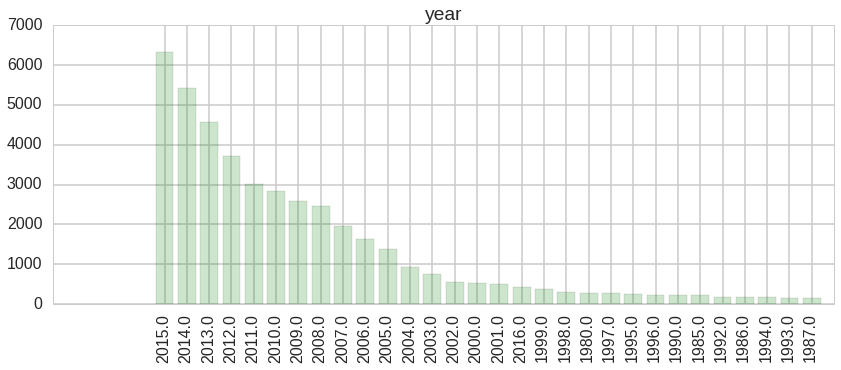

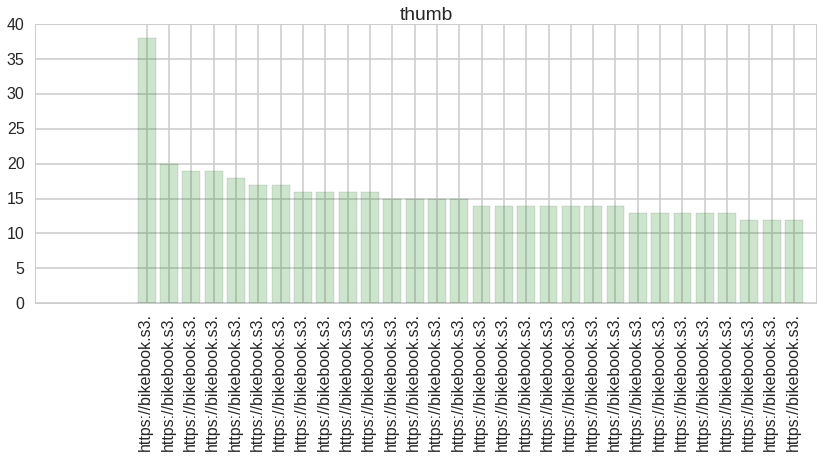

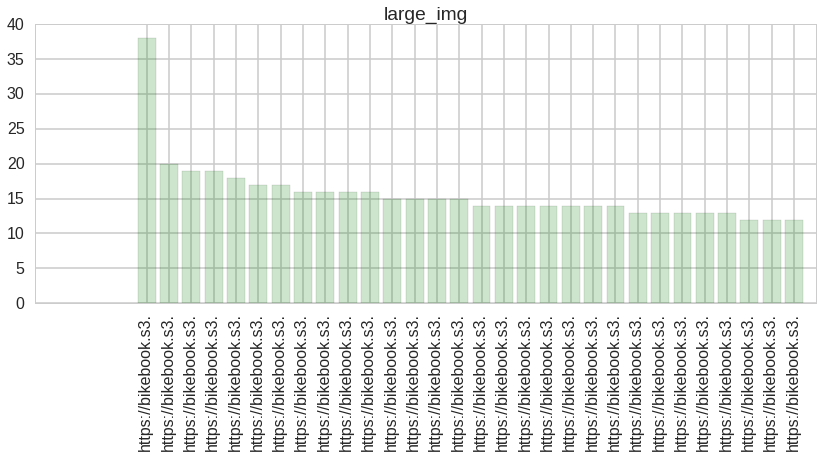

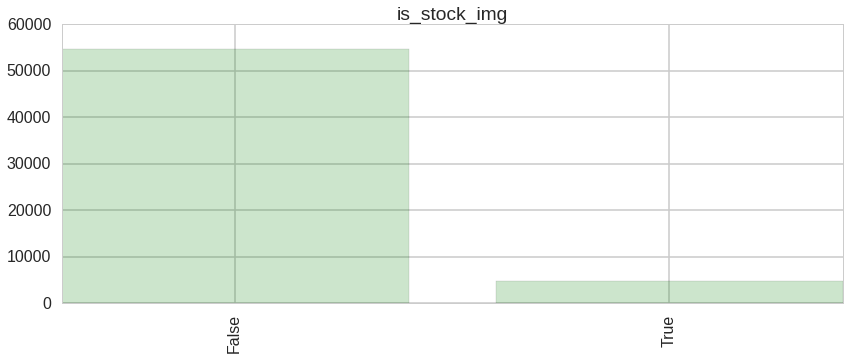

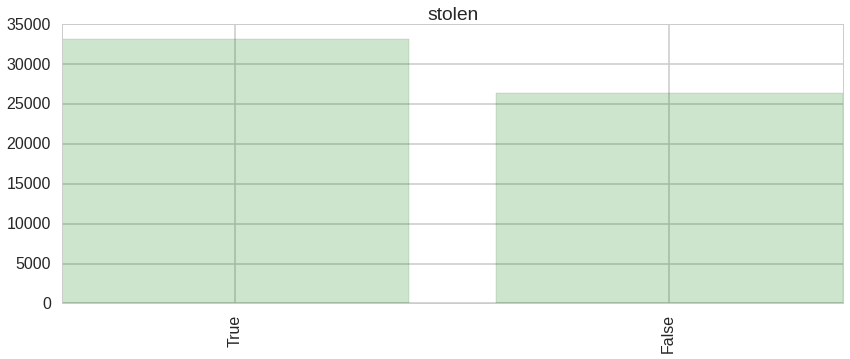

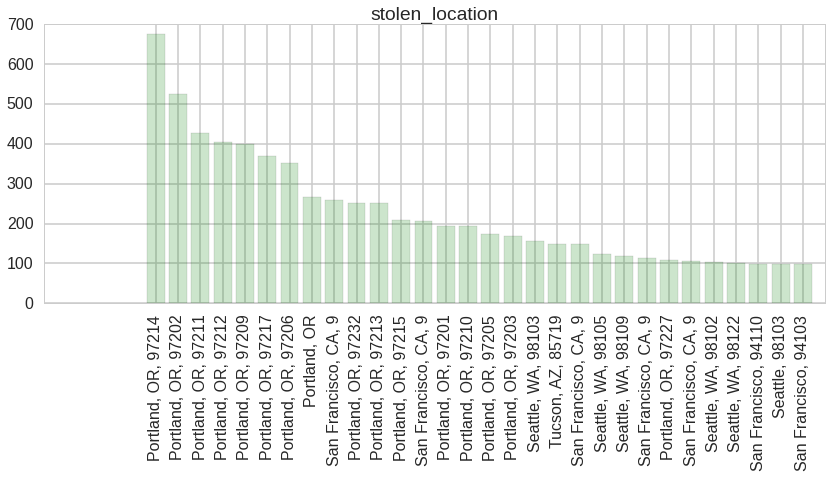

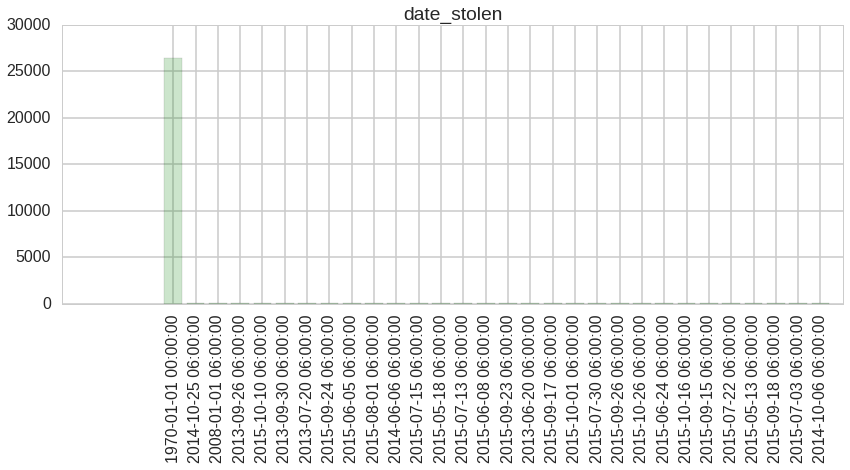

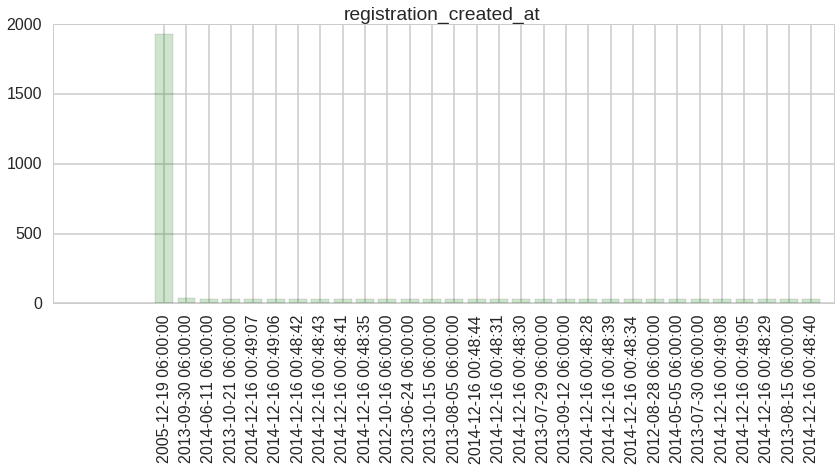

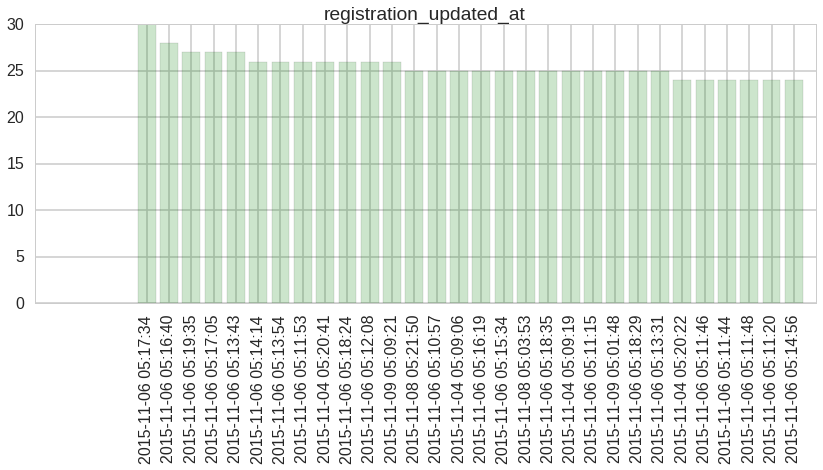

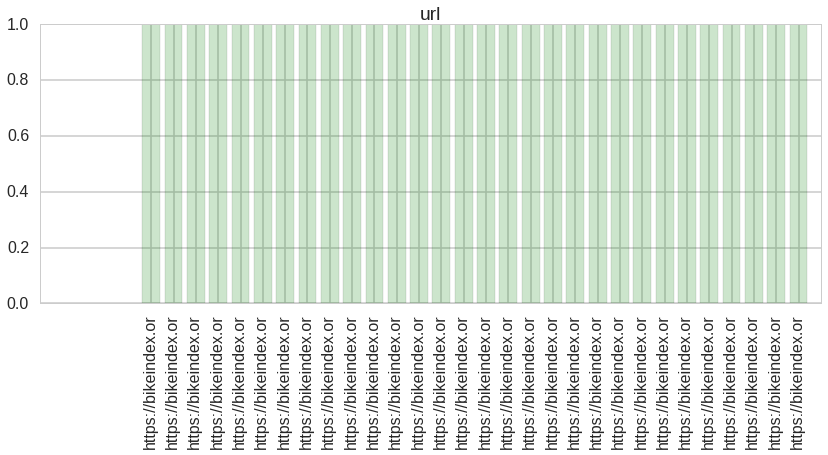

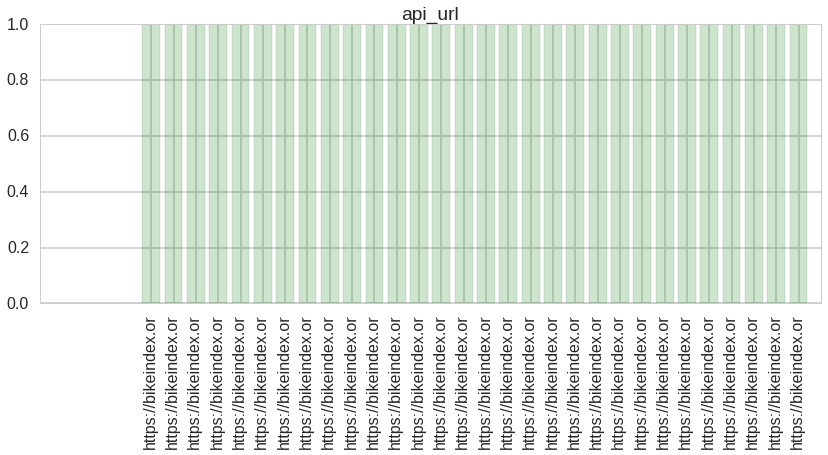

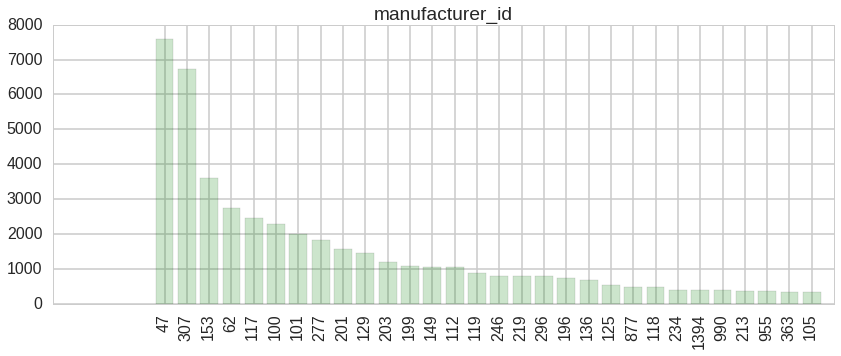

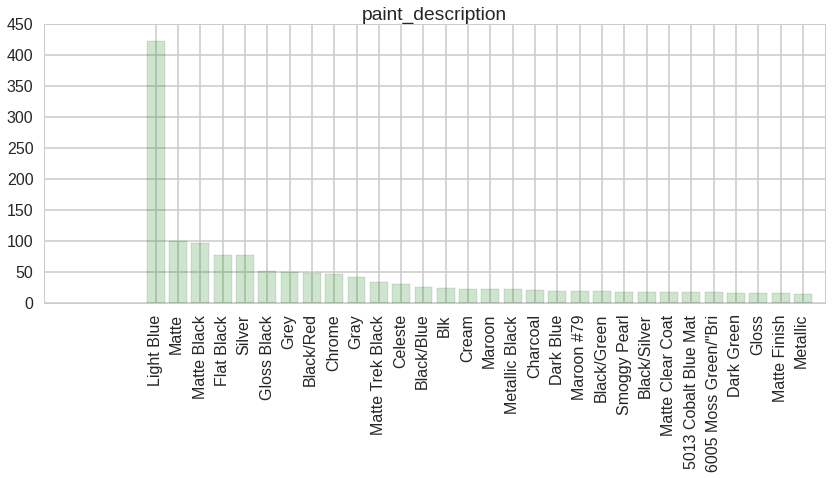

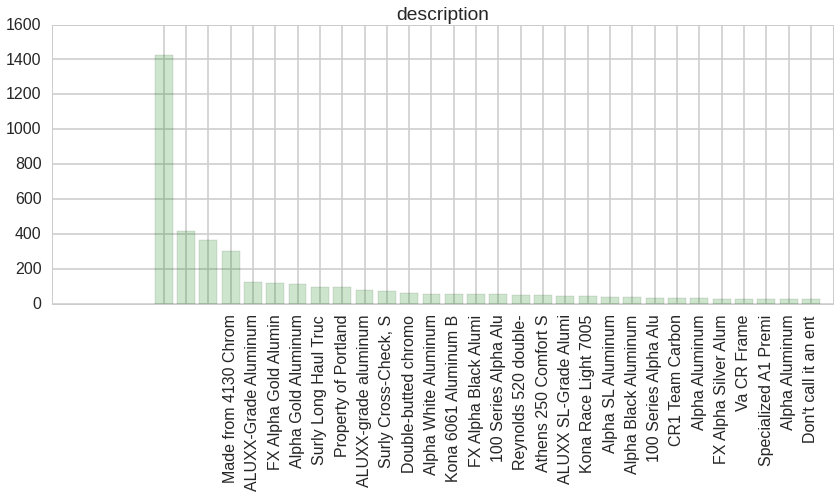

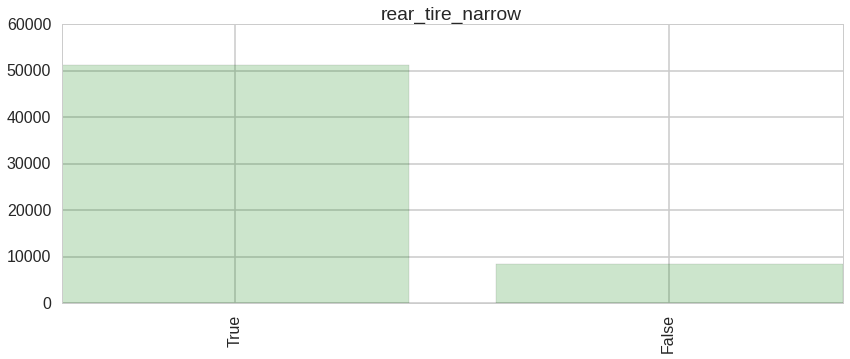

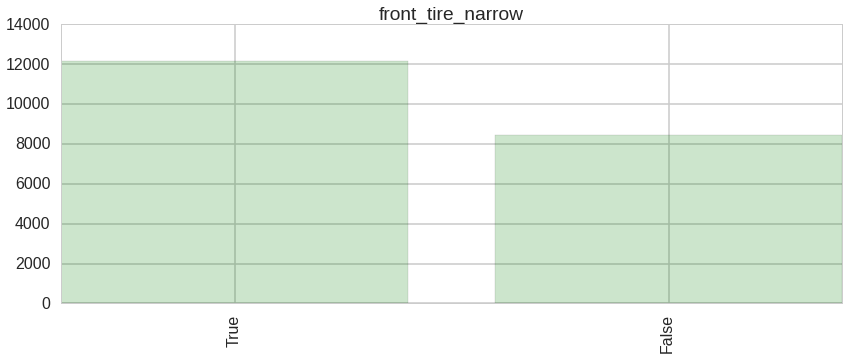

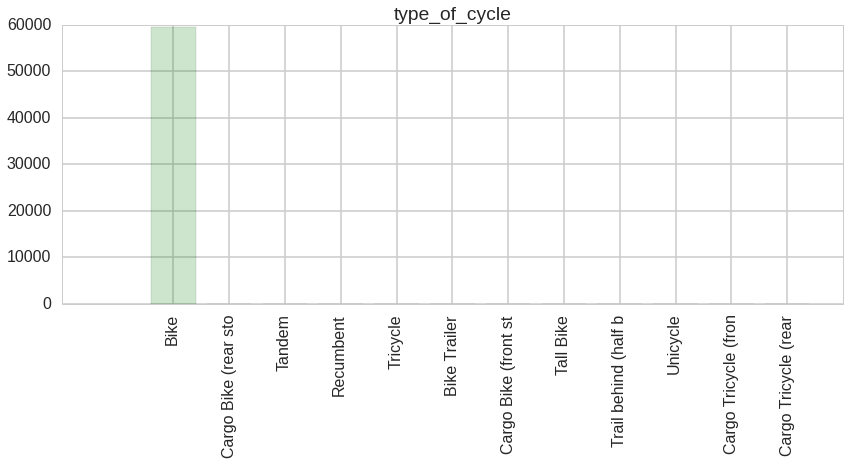

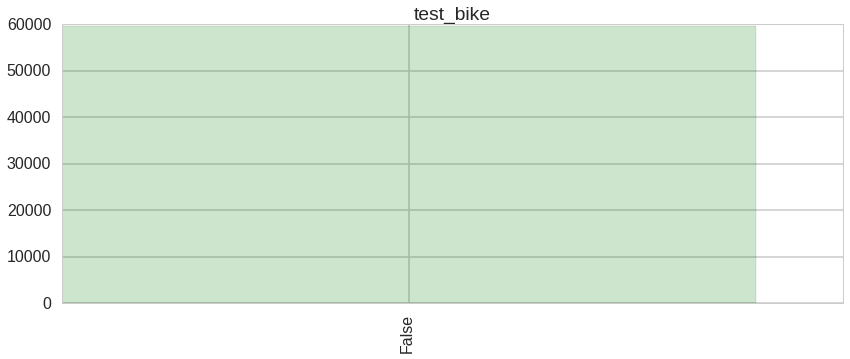

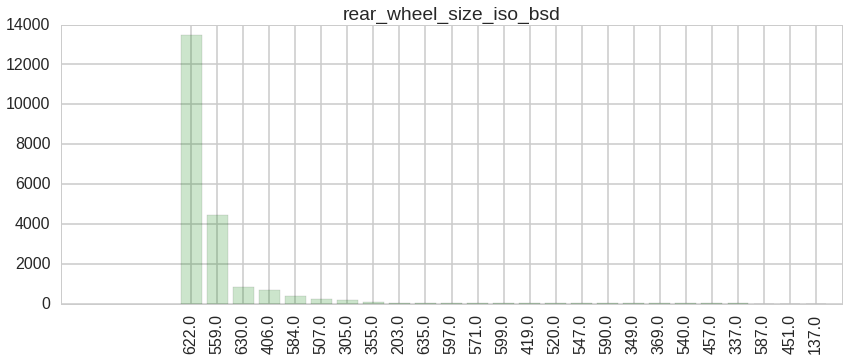

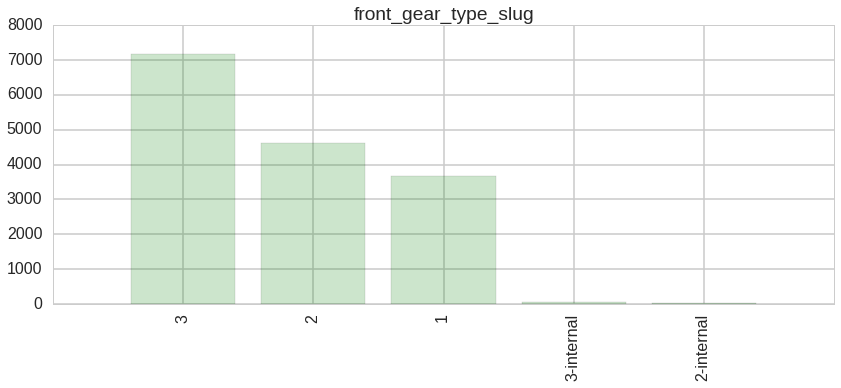

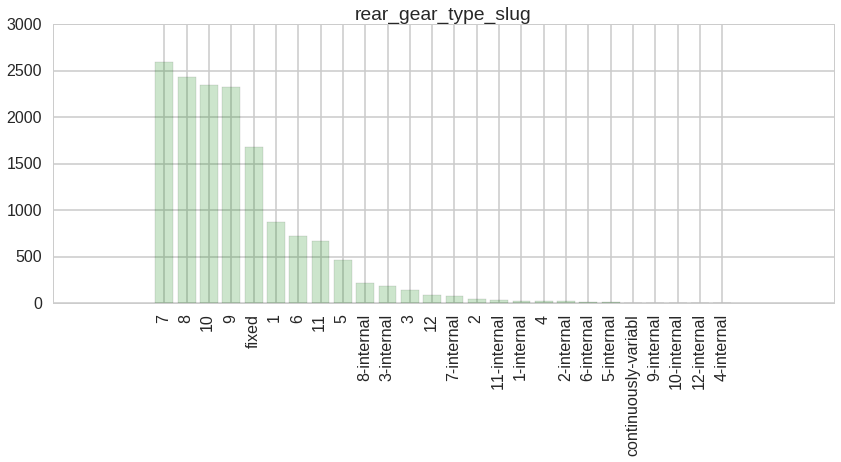

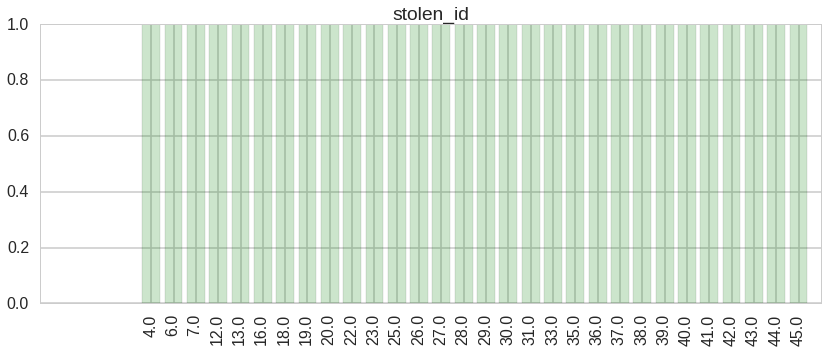

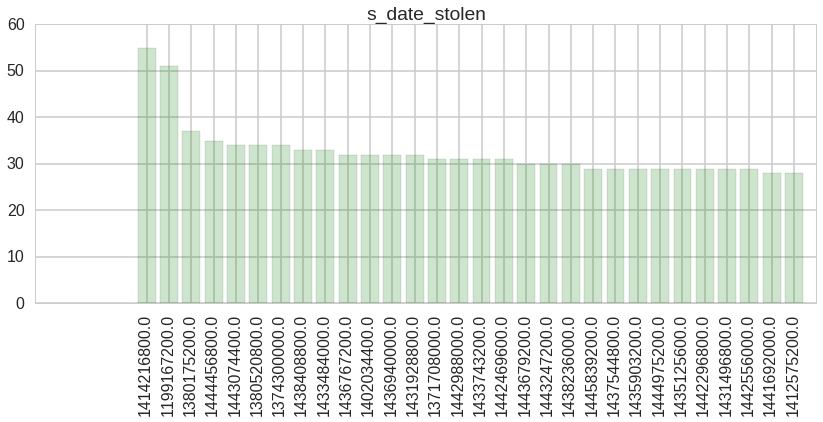

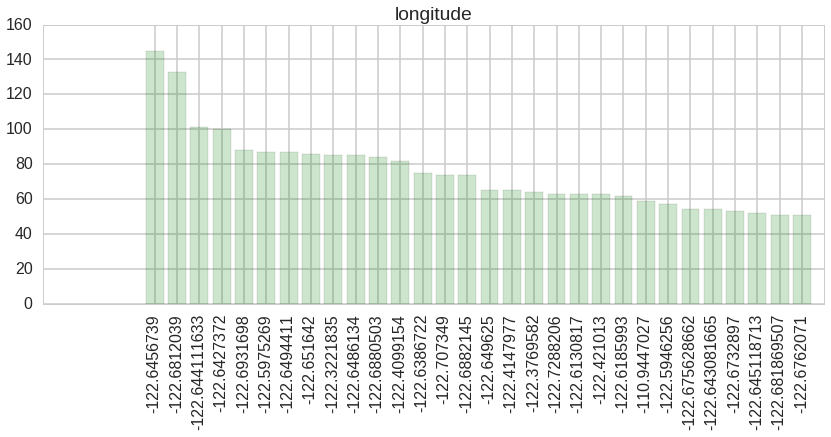

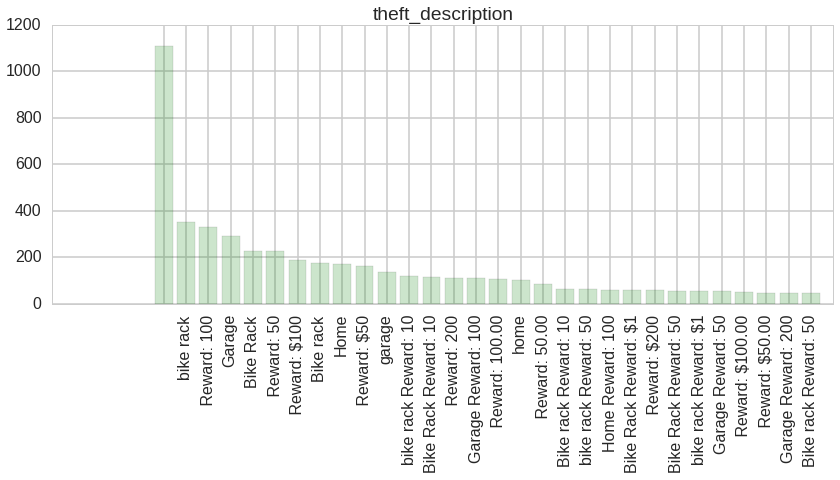

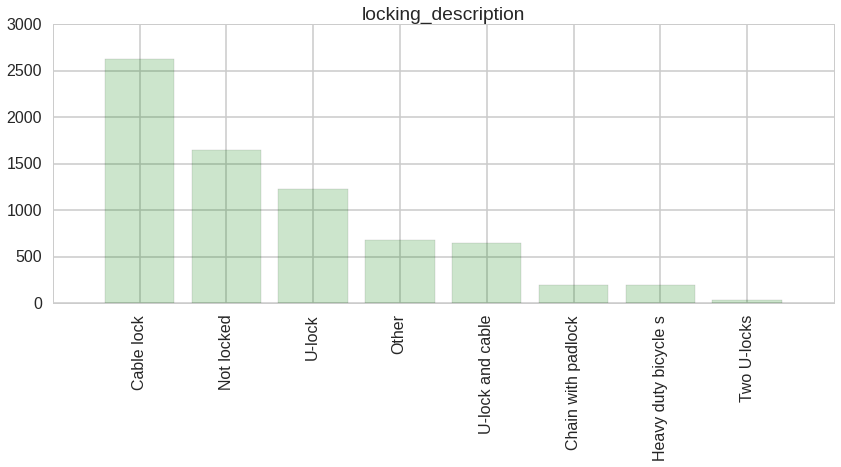

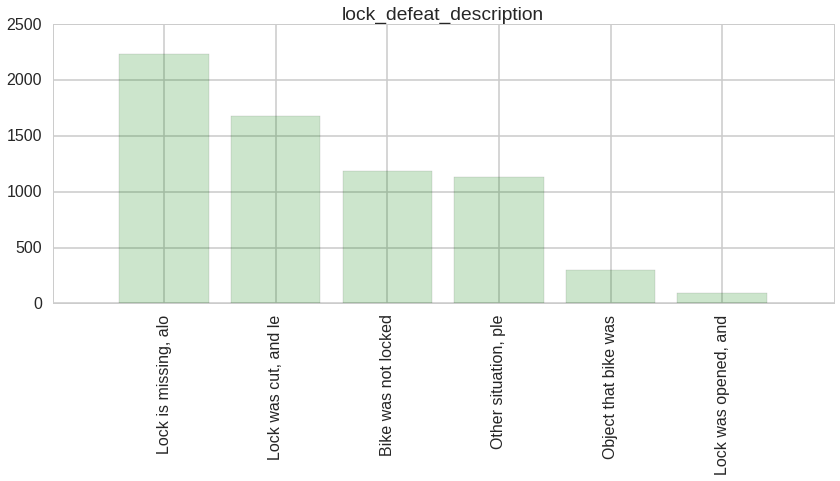

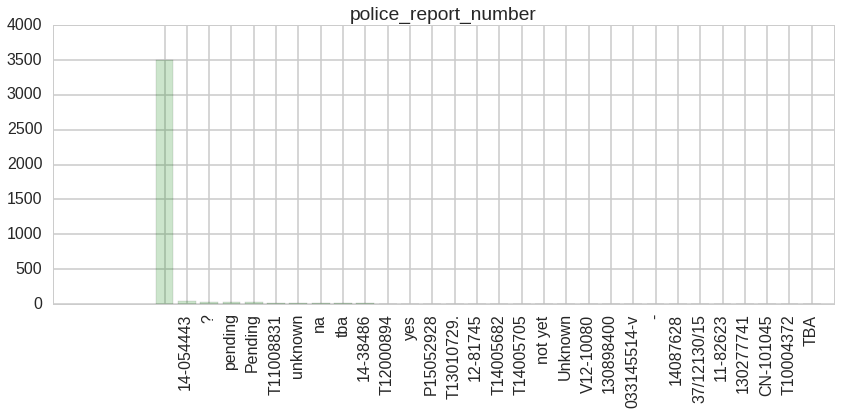

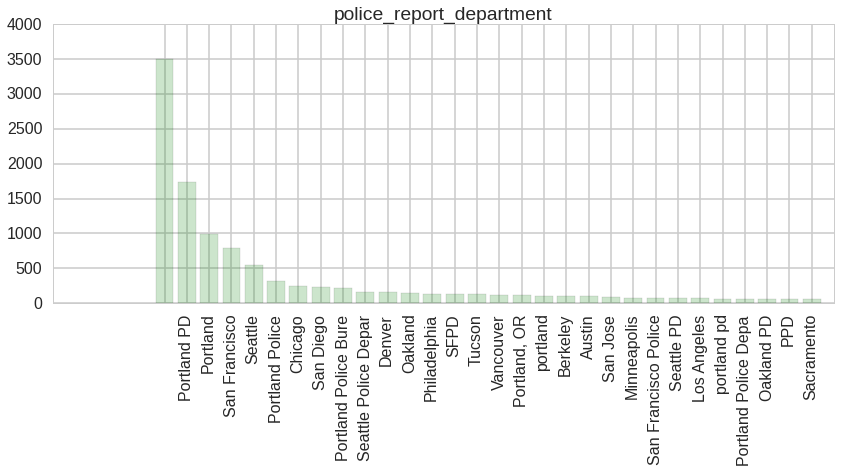

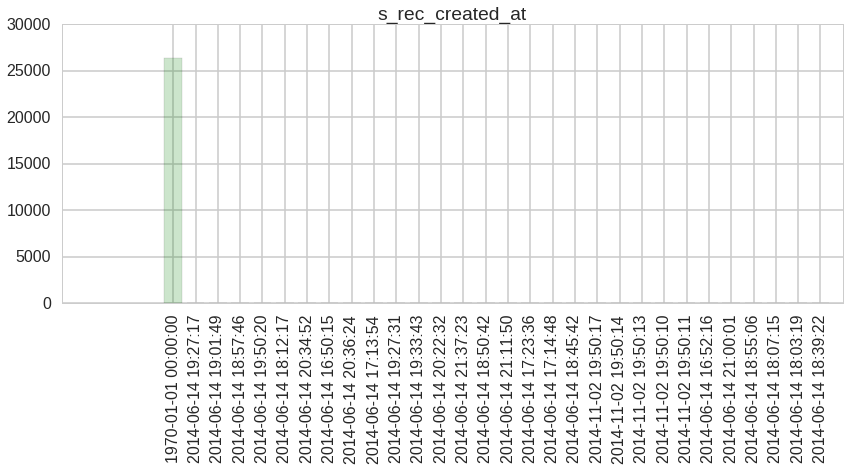

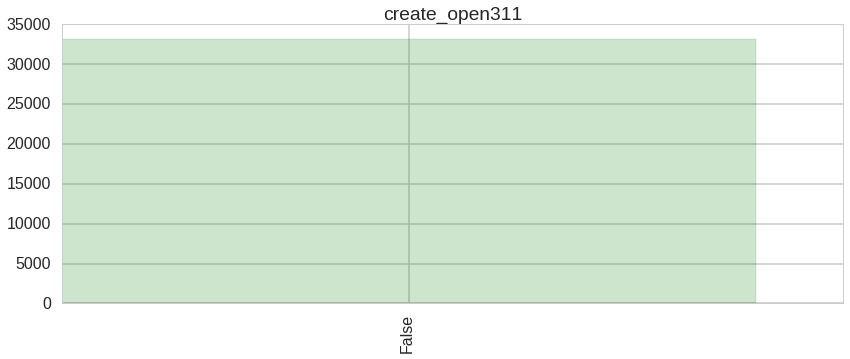

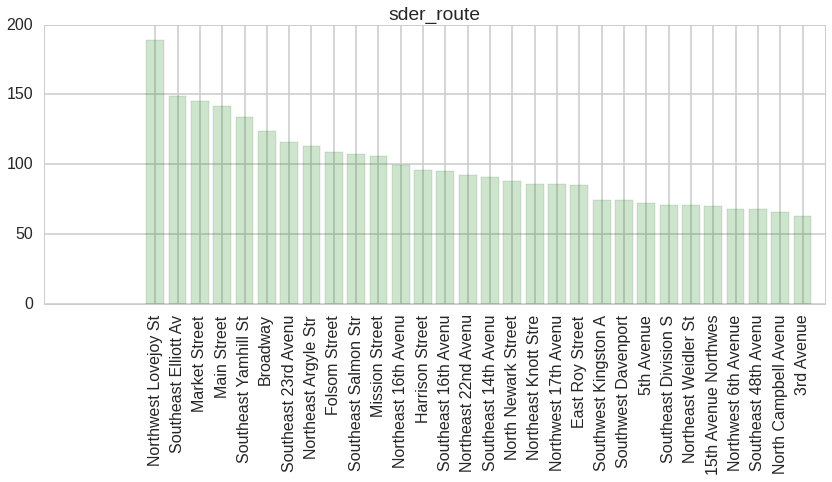

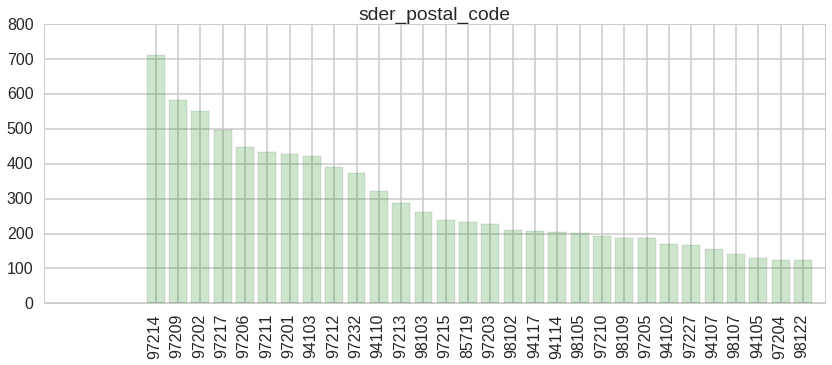

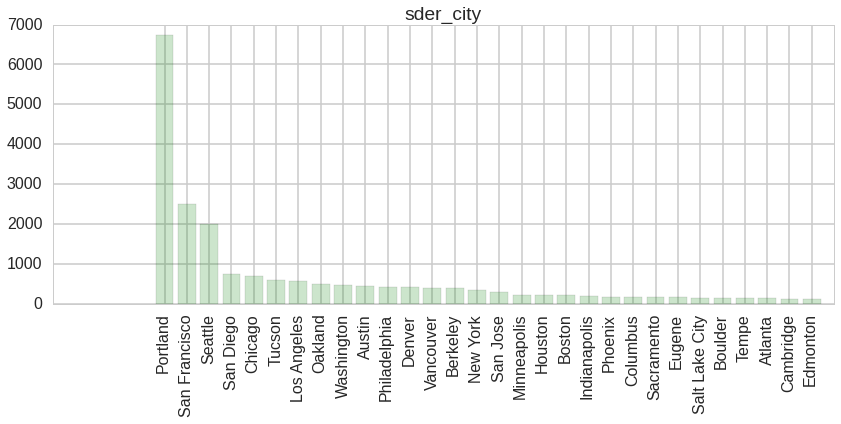

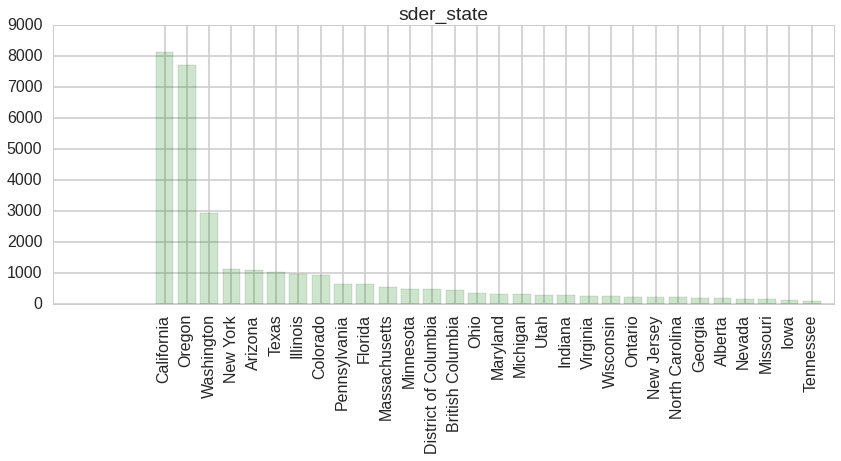

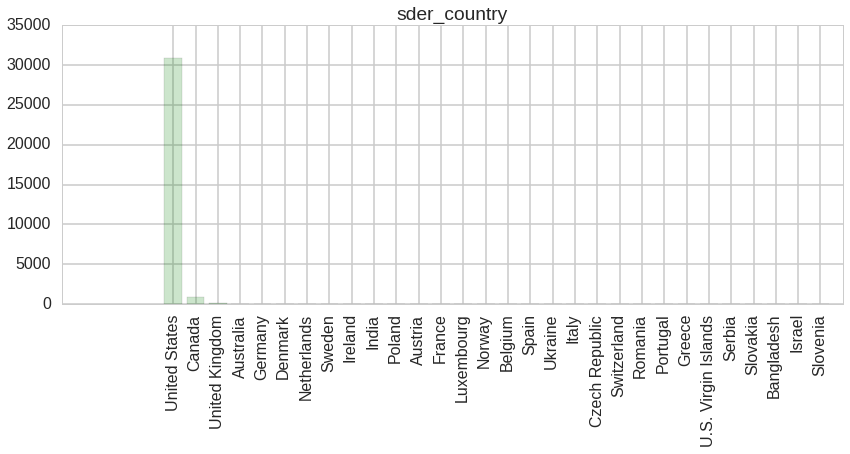

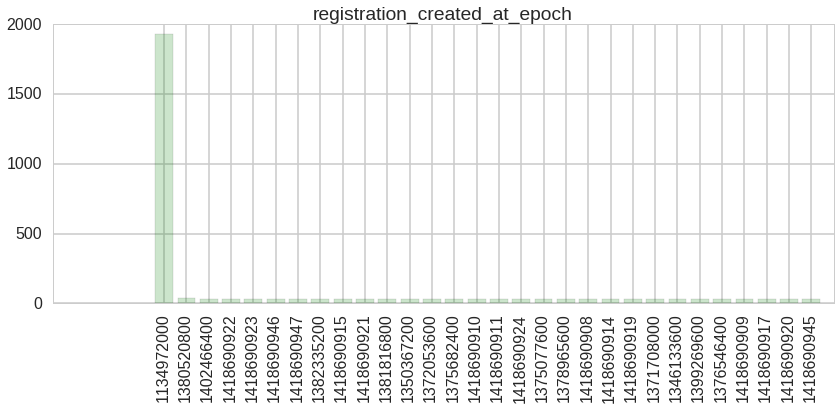

In [6]:
for v in df.columns:
    plotDictionary ( 
    dict (  df[v].value_counts()) 
    , topN = 30 
    , ax = None 
    , c = 'g'
    , columnName = v
    , labelRotation = 90)

In [7]:
# Cleansing Values in Year Column

rowsToBeDeleted = []

for idx in range(df.shape[0]):
    
    if pd.isnull(df['year'].iloc[idx]) :
        rowsToBeDeleted.append(idx)
        continue
    
    if ( df['year'].iloc[idx] >= 0 and df['year'].iloc[idx] <= 16 )  :
        df['year'].iloc[idx] = 2000 + df['year'].iloc[idx]
        continue
        
    if ( df['year'].iloc[idx] >= 17 and df['year'].iloc[idx] <= 19 ) :
        rowsToBeDeleted.append(idx)
        continue
        
    if ( df['year'].iloc[idx] == 20) :
        df['year'].iloc[idx] = 2000
        continue    
        
    if ( df['year'].iloc[idx] >= 21 and df['year'].iloc[idx] <= 99 ) :
        df['year'].iloc[idx] = 1900 + df['year'].iloc[idx]
        continue 
    
    if ( df['year'].iloc[idx] >= 100 and df['year'].iloc[idx] <= 189 ) :
        rowsToBeDeleted.append(idx)
        continue
        
    if ( df['year'].iloc[idx] >= 190 and df['year'].iloc[idx] <= 200 ) :
        df['year'].iloc[idx] =  df['year'].iloc[idx] * 10
        continue 
        
    if ( df['year'].iloc[idx] >= 201 and df['year'].iloc[idx] <= 1799 ) :
        rowsToBeDeleted.append(idx)
        continue
        
    if ( df['year'].iloc[idx] >= 1800 and df['year'].iloc[idx] <= 2016 ) :
        continue 
    
    if ( df['year'].iloc[idx] >= 18000 and df['year'].iloc[idx] <= 20160 ) :
        df['year'].iloc[idx] =  round( df['year'].iloc[idx] / 10 )
        continue 
        
    rowsToBeDeleted.append(idx)
        
        
print len(rowsToBeDeleted)

df_clean = df.drop(df.index[rowsToBeDeleted])

print df_clean.shape
print np.unique (df_clean['year'])

14610
(45009, 57)
[ 1884.  1885.  1908.  1910.  1920.  1935.  1938.  1940.  1941.  1942.
  1943.  1948.  1950.  1952.  1953.  1954.  1955.  1956.  1957.  1958.
  1959.  1960.  1961.  1962.  1963.  1964.  1965.  1966.  1967.  1968.
  1969.  1970.  1971.  1972.  1973.  1974.  1975.  1976.  1977.  1978.
  1979.  1980.  1981.  1982.  1983.  1984.  1985.  1986.  1987.  1988.
  1989.  1990.  1991.  1992.  1993.  1994.  1995.  1996.  1997.  1998.
  1999.  2000.  2001.  2002.  2003.  2004.  2005.  2006.  2007.  2008.
  2009.  2010.  2011.  2012.  2013.  2014.  2015.  2016.]


/home/anusha/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
## Data stolen - Column cleansing

#dateStolen = df.date_stolen
#print np.min(dateStolen)
#print np.max(dateStolen)

#dateStolenOnly = df[df.date_stolen !="1970-01-01 00:00:00"]
#dateStolenOnly1 = dateStolenOnly[dateStolenOnly.date_stolen !="1970-03-01 06:00:00"]

#print np.min(dateStolenOnly1.date_stolen)


In [9]:
# Removing columns which do not hold any useful data
df_clean = df_clean.drop ( ['Unnamed: 0', 'id' , 'title' , 'serial' ,'stolen_id', 
            'thumb', 'large_img', 'is_stock_img' , 'url' , 'api_url',
            's_location', 'latitude', 'longitude', 'name',
            'stolen_location' , 'test_bike' , 'type_of_cycle' ,
            'theft_description', 'locking_description', 'lock_defeat_description', 
            'police_report_number', 'police_report_department',  
            'create_open311', 'sder_formatted_address', 'sder_street_number', 'sder_route', 
            'sder_postal_code', 'sder_neighborhood', 'sder_city', 'sder_county', 'sder_state', 
            'sder_country' ] , axis = 1 )

# Removing columns with repeat information
df_clean = df_clean.drop ( [ 'registration_created_at_epoch' ,'s_date_stolen',  'registration_updated_at_epoch' ,
            's_rec_created_at', 'date_stolen_epoch', 's_rec_created_at_epoch', 'registration_updated_at'] , axis = 1 )

# Removing columns with Too sparse data
df_clean = df_clean.drop ( ['frame_model'] , axis = 1 )

print df_clean.columns

Index([u'manufacturer_name', u'year', u'stolen', u'date_stolen', u'registration_created_at', u'manufacturer_id', u'paint_description', u'frame_size', u'description', u'rear_tire_narrow', u'front_tire_narrow', u'rear_wheel_size_iso_bsd', u'front_wheel_size_iso_bsd', u'handlebar_type_slug', u'frame_material_slug', u'front_gear_type_slug', u'rear_gear_type_slug'], dtype='object')


In [10]:
# Text Processing - Description column

from pattern.en import parse
from pattern.en import pprint
from pattern.vector import stem, PORTER, LEMMA
punctuation = list('.,;:!?()[]{}`''\/"@#$^&*+-|=~_')

from sklearn.feature_extraction import text 
stopwords=text.ENGLISH_STOP_WORDS

from nltk.stem.wordnet import WordNetLemmatizer
import nltk
#nltk.download()
lmtzr = WordNetLemmatizer()

import re
import math
regex1=re.compile(r"\.{2,}")
regex2=re.compile(r"\-{2,}")



def get_keywords(thetext):
    if pd.isnull(thetext) :
        return ''
    thetext=re.sub(regex1, ' ', thetext)
    thetext=re.sub(regex2, ' ', thetext)
    keywords=[]
    for i,sentence in enumerate(parse(thetext, tokenize=True, lemmata=True).split()):
        for token in sentence:
            if len(token[4]) >0:
                if token[1] in ['JJ', 'JJR', 'JJS', 'NN', 'NNS','NNP','NNPS']:
                    if (token[4] in stopwords or 
                        token[4][0] in punctuation or 
                        token[4][-1] in punctuation or 
                        len(token[4])== 1):
                        
                        continue
                        
                    tmp = token[4:]
                    # Using a second library for additional lemmatization
                    for i in range(len(tmp)) :
                        tmp[i] = lmtzr.lemmatize(tmp[i])
                    keywords.append( ' '.join(tmp))
    keywordString = ' '.join(keywords)
    return keywordString

get_keywords("Tan With Light Blue Logo And Stripes")
#get_keywords("Blk/Char/Red")




u'tan light blue logo stripe'

In [11]:
df_clean['description_kw'] = df_clean.description.apply(get_keywords)
df_clean['paint_description_kw'] = df_clean.paint_description.apply(get_keywords)



    

/home/anusha/anaconda/lib/python2.7/site-packages/pattern/text/__init__.py:979: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  and tokens[j] in ("'", "\"", u"”", u"’", "...", ".", "!", "?", ")", EOS):


In [12]:
df_clean['manufacturer_id'] = df_clean.manufacturer_id.apply(str)

In [13]:
# Frame size dictionary

fp = open('frame_size.csv','r')
fp.next()
frameSizeDict = {}
for line in fp:
    tmp =  line.replace('\n','').split(',')
    frameSizeDict[ tmp[0]] = tmp[1] 
fp.close()

def lookUpFrameDict(key) :
    if pd.isnull(key):
        return ''
    return frameSizeDict[key]

df_clean['frame_size_std'] = df_clean.frame_size.apply(lookUpFrameDict)


In [14]:
tempDictionary = df_clean[['manufacturer_id','rear_tire_narrow','front_tire_narrow','rear_wheel_size_iso_bsd','front_wheel_size_iso_bsd','handlebar_type_slug','frame_material_slug','front_gear_type_slug','rear_gear_type_slug','frame_size_std','year','stolen']].apply(dict , axis = 1)

In [15]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

bikeAttributesDataAll = vec.fit_transform(tempDictionary).toarray()
allColumns = vec.get_feature_names()
print len(allColumns)


# Drop sparsely populated columns from Bike Attributes Data      

x = sum(bikeAttributesDataAll)
selectedColumns = []
selectedColumnsIdx = []

for i in range(len(x)) :
    if x[i] > -1 :
        selectedColumns.append(allColumns[i])
        selectedColumnsIdx.append(i)
        
print len(selectedColumns)
print selectedColumns

bikeAttributesDataSelectedColumns = [ x[selectedColumnsIdx]   for x in bikeAttributesDataAll]

677
670
['frame_material_slug=aluminum', 'frame_material_slug=composite', 'frame_material_slug=organic', 'frame_material_slug=steel', 'frame_material_slug=titanium', 'frame_size_std=', 'frame_size_std=>XL\r', 'frame_size_std=L\r', 'frame_size_std=M\r', 'frame_size_std=S\r', 'frame_size_std=XL\r', 'frame_size_std=XS\r', 'frame_size_std=XXS\r', 'frame_size_std=unknown\r', 'front_gear_type_slug=1', 'front_gear_type_slug=2', 'front_gear_type_slug=2-internal', 'front_gear_type_slug=3', 'front_gear_type_slug=3-internal', 'handlebar_type_slug=bmx', 'handlebar_type_slug=drop', 'handlebar_type_slug=flat', 'handlebar_type_slug=forward', 'handlebar_type_slug=other', 'handlebar_type_slug=rearward', 'manufacturer_id=1', 'manufacturer_id=100', 'manufacturer_id=1000', 'manufacturer_id=1001', 'manufacturer_id=1003', 'manufacturer_id=1006', 'manufacturer_id=1007', 'manufacturer_id=1008', 'manufacturer_id=1009', 'manufacturer_id=101', 'manufacturer_id=1011', 'manufacturer_id=1012', 'manufacturer_id=1013

In [16]:
# Columns Couunt
print len( bikeAttributesDataAll[0] )
print len ( bikeAttributesDataSelectedColumns[0])

677
670


In [17]:
# Rows Count
print len( bikeAttributesDataAll )
print len ( bikeAttributesDataSelectedColumns)

45009
45009


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=50) ## Minimum document frequency - 50
corpus = df_clean['paint_description_kw'].values

X = vectorizer.fit_transform(corpus)
paintDescKeyWordFeatures = vectorizer.get_feature_names()
print paintDescKeyWordFeatures
paintDescFeaturesData = X.toarray()

# Row Count
print len(paintDescFeaturesData)

# Column count
print len(paintDescFeaturesData[0])

[u'accent', u'black', u'blk', u'blue', u'bright', u'carbon', u'celeste', u'charcoal', u'chrome', u'clear', u'coat', u'color', u'cream', u'crystal', u'cyan', u'dark', u'decal', u'flat', u'fork', u'frame', u'gloss', u'glossy', u'gold', u'gray', u'green', u'grey', u'highlight', u'letter', u'lettering', u'light', u'logo', u'maroon', u'matt', u'matte', u'metallic', u'neon', u'orange', u'paint', u'pearl', u'pink', u'purple', u'red', u'satin', u'seat', u'silver', u'sticker', u'stripe', u'teal', u'trek', u'trim', u'tube', u'white', u'wht', u'yellow']
45009
54


In [19]:
# merge black and blk
# merge white and wht
# merge matte and matt
# merge letter and lettering
# merge gray and grey
def cleanKeyWords(paintDesc):
    return paintDesc.replace('blk','black').replace('wht','white').replace('matte','matt').replace('lettering','letter').replace('gray','grey').replace('glossy','gloss')

df_clean['paint_description_kw'] = df_clean.paint_description_kw.apply(cleanKeyWords)

# Re-running count vectorizer after determining words to be ignored from the paint description
ignore_words = ['color' , 'flat' , 'fork' , 'frame' , 'highlight' , 'satin' , 'sticker', 'trek' , 'trim' , 'tube']
vectorizer = CountVectorizer(min_df=50,stop_words = ignore_words) 

X = vectorizer.fit_transform(corpus)
paintDescKeyWordFeatures = vectorizer.get_feature_names()
print paintDescKeyWordFeatures
paintDescFeaturesData = X.toarray()

# Row Count
print len(paintDescFeaturesData)

# Column count
print len(paintDescFeaturesData[0])

#colorsIwant = [u'accent', u'black', u'blk', u'blue', u'bright', u'carbon', u'charcoal', u'chrome', u'clear', u'coat', u'cream', u'crystal', u'cyan', u'dark', u'decal', u'flat', u'fork', u'gloss', u'glossy', u'gold', u'gray', u'green', u'grey', u'letter', u'lettering', u'light', u'logo', u'maroon', u'matte', u'metallic', u'neon', u'orange', u'pearl', u'pink', u'purple', u'red', u'silver', u'stripe', u'teal', u'trim', u'white', u'wht', u'yellow']

[u'accent', u'black', u'blue', u'bright', u'carbon', u'celeste', u'charcoal', u'chrome', u'clear', u'coat', u'cream', u'crystal', u'cyan', u'dark', u'decal', u'gloss', u'gold', u'green', u'grey', u'letter', u'light', u'logo', u'maroon', u'matt', u'metallic', u'neon', u'orange', u'paint', u'pearl', u'pink', u'purple', u'red', u'seat', u'silver', u'stripe', u'teal', u'white', u'yellow']
45009
38


In [20]:
finalData = np.concatenate((bikeAttributesDataSelectedColumns, paintDescFeaturesData), axis=1)
finalColumns =  selectedColumns + paintDescKeyWordFeatures
print len(finalData) # Rows Count
print len(finalData[0]) # Columns Count

45009
708


In [21]:
features = []
for x in finalColumns :
    if x != 'stolen' :
        features.append(x)


In [22]:
finalDataDF = pd.DataFrame( finalData , columns = finalColumns)

In [23]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

itrain, itest = train_test_split(xrange(finalDataDF.shape[0]), train_size=0.7)
mask=np.ones(finalDataDF.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

from sklearn.preprocessing import StandardScaler
for col in features:
    #print col
    #print np.min(finalDataDF[col])
    valstrain=finalDataDF[col].values[mask]
    valstest=finalDataDF[col].values[~mask]
    scaler=StandardScaler().fit(valstrain)
    outtrain=scaler.transform(valstrain)
    outtest=scaler.fit_transform(valstest)
    out=np.empty(mask.shape[0])
    out[mask]=outtrain
    out[~mask]=outtest
    finalDataDF[col]=out

In [24]:
from sklearn.decomposition import PCA

componentsCount = 200
pca = PCA(n_components=componentsCount)

dataAfterPCA = pca.fit_transform(finalDataDF[features])
columnsAfterPCA = [ x[0] + "_" + x[1] for x in zip( ['pca'] * componentsCount , [ str(i) for i in range(componentsCount)])] 

finalDFPCA = pd.DataFrame ( dataAfterPCA , columns = columnsAfterPCA)
finalDFPCA['stolen'] = finalDataDF['stolen']

In [25]:
finalDFPCA.stolen.value_counts()

1    27125
0    17884
Name: stolen, dtype: int64

In [26]:
# The baseline accuracy score is 27125/(27125+17884) = 0.60

In [27]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

itrain, itest = train_test_split(xrange(finalDataDF.shape[0]), train_size=0.7)
mask=np.ones(finalDataDF.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)


In [28]:
# Create test/train mask

from sklearn.ensemble import RandomForestClassifier
clfForest = RandomForestClassifier()

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best


def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [29]:
parameters = {"n_estimators": range(1, 101, 5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDFPCA, columnsAfterPCA, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='f1')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 61} 0.790199140453 [mean: 0.77201, std: 0.04748, params: {'n_estimators': 1}, mean: 0.78242, std: 0.06423, params: {'n_estimators': 6}, mean: 0.78764, std: 0.06049, params: {'n_estimators': 11}, mean: 0.78874, std: 0.06455, params: {'n_estimators': 16}, mean: 0.78951, std: 0.06162, params: {'n_estimators': 21}, mean: 0.78910, std: 0.06553, params: {'n_estimators': 26}, mean: 0.78811, std: 0.06353, params: {'n_estimators': 31}, mean: 0.78768, std: 0.06598, params: {'n_estimators': 36}, mean: 0.78888, std: 0.06217, params: {'n_estimators': 41}, mean: 0.78902, std: 0.06504, params: {'n_estimators': 46}, mean: 0.78999, std: 0.06523, params: {'n_estimators': 51}, mean: 0.78934, std: 0.06521, params: {'n_estimators': 56}, mean: 0.79020, std: 0.06542, params: {'n_estimators': 61}, mean: 0.78979, std: 0.06536, params: {'n_estimators': 66}, mean: 0.78945, std: 0.06469, params: {'n_estimators': 71}, mean: 0.78848, std: 0.06575, params: {'n_estimators': 76}, mean: 0.78938, s

In [30]:
signi_PCA = zip(columnsAfterPCA, clfForest.feature_importances_)
signi_PCA = pd.DataFrame(signi_PCA, columns = ["features", "importance"])
signi_PCA.sort(columns = ["importance"], ascending = False, inplace = True)
signi_PCA

/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


features  importance
0      pca_0    0.050572
6      pca_6    0.037747
3      pca_3    0.036716
5      pca_5    0.035207
11    pca_11    0.025191
1      pca_1    0.024793
12    pca_12    0.020056
2      pca_2    0.017915
7      pca_7    0.015490
4      pca_4    0.012201
13    pca_13    0.010881
17    pca_17    0.010794
8      pca_8    0.010463
16    pca_16    0.009282
9      pca_9    0.008146
59    pca_59    0.007327
14    pca_14    0.006689
15    pca_15    0.006664
35    pca_35    0.006612
44    pca_44    0.006594
10    pca_10    0.006177
26    pca_26    0.005958
32    pca_32    0.005907
29    pca_29    0.005454
21    pca_21    0.005446
30    pca_30    0.005419
18    pca_18    0.005393
38    pca_38    0.005289
27    pca_27    0.005255
191  pca_191    0.005226
..       ...         ...
143  pca_143    0.002942
144  pca_144    0.002942
141  pca_141    0.002938
186  pca_186    0.002936
171  pca_171    0.002909
176  pca_176    0.002904
124  pca_124    0.002903
159  pca_159    0.002865
99    pca_99    0.002861
156  pca_156    0.002838
193  pca_193    0.002833
157  pca_157    0.002833
194  pca_194    0.002829
142  pca_142    0.002826
158  pca_158    0.002805
129  pca_129    0.002783
123  pca_123    0.002773
172  pca_172    0.002769
117  pca_117    0.002757
155  pca_155    0.002756
182  pca_182    0.002753
146  pca_146    0.002745
132  pca_132    0.002744
197  pca_197    0.002737
196  pca_196    0.002730
147  pca_147    0.002721
178  pca_178    0.002640
162  pca_162    0.002570
140  pca_140    0.002460
102  pca_102    0.002421

[200 rows x 2 columns]

In [32]:
parameters = {"n_estimators": range(1, 101, 5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDataDF, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='f1')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 91} 0.805341906876 [mean: 0.78596, std: 0.04691, params: {'n_estimators': 1}, mean: 0.79594, std: 0.06346, params: {'n_estimators': 6}, mean: 0.80076, std: 0.05694, params: {'n_estimators': 11}, mean: 0.79866, std: 0.06305, params: {'n_estimators': 16}, mean: 0.79979, std: 0.06001, params: {'n_estimators': 21}, mean: 0.80040, std: 0.06228, params: {'n_estimators': 26}, mean: 0.80111, std: 0.06153, params: {'n_estimators': 31}, mean: 0.80233, std: 0.06297, params: {'n_estimators': 36}, mean: 0.80167, std: 0.06274, params: {'n_estimators': 41}, mean: 0.80162, std: 0.06336, params: {'n_estimators': 46}, mean: 0.80172, std: 0.06308, params: {'n_estimators': 51}, mean: 0.80273, std: 0.06440, params: {'n_estimators': 56}, mean: 0.80422, std: 0.06325, params: {'n_estimators': 61}, mean: 0.80496, std: 0.06300, params: {'n_estimators': 66}, mean: 0.80400, std: 0.06201, params: {'n_estimators': 71}, mean: 0.80409, std: 0.06352, params: {'n_estimators': 76}, mean: 0.80464, s

In [33]:
signi_features = zip(features, clfForest.feature_importances_)
signi_features = pd.DataFrame(signi_features, columns = ["features", "importance"])
signi_features.sort(columns = ["importance"], ascending = False, inplace = True)
signi_features

/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


features    importance
668                           year  3.244037e-01
3        frame_material_slug=steel  3.627816e-02
5                  frame_size_std=  3.463784e-02
0     frame_material_slug=aluminum  3.328722e-02
20        handlebar_type_slug=drop  3.278901e-02
21        handlebar_type_slug=flat  2.217985e-02
15          front_gear_type_slug=2  2.026470e-02
17          front_gear_type_slug=3  1.937504e-02
667               rear_tire_narrow  1.674893e-02
14          front_gear_type_slug=1  1.404322e-02
643         rear_gear_type_slug=10  1.215558e-02
1    frame_material_slug=composite  1.202678e-02
663          rear_gear_type_slug=9  1.177194e-02
503             manufacturer_id=47  1.146985e-02
10             frame_size_std=XL\r  1.122056e-02
8               frame_size_std=M\r  1.109895e-02
7               frame_size_std=L\r  1.082043e-02
446            manufacturer_id=307  1.053002e-02
670                          black  1.032865e-02
9               frame_size_std=S\r  9.771339e-03
661          rear_gear_type_slug=8  8.831657e-03
34             manufacturer_id=101  8.392943e-03
659          rear_gear_type_slug=7  8.264716e-03
361            manufacturer_id=153  8.261663e-03
11             frame_size_std=XS\r  8.150141e-03
385            manufacturer_id=201  7.259373e-03
705                          white  6.919152e-03
527             manufacturer_id=62  6.912855e-03
671                           blue  6.195699e-03
666      rear_gear_type_slug=fixed  5.379622e-03
..                             ...           ...
310           manufacturer_id=1352  4.226589e-06
226           manufacturer_id=1214  4.117209e-06
37            manufacturer_id=1013  4.069670e-06
200           manufacturer_id=1186  3.969305e-06
496            manufacturer_id=424  3.765462e-06
429            manufacturer_id=280  3.761079e-06
290           manufacturer_id=1288  3.696126e-06
28            manufacturer_id=1001  3.658245e-06
39            manufacturer_id=1016  3.579321e-06
511            manufacturer_id=536  3.569682e-06
343           manufacturer_id=1393  3.533157e-06
102           manufacturer_id=1087  3.447587e-06
108           manufacturer_id=1092  3.443411e-06
329           manufacturer_id=1379  3.426941e-06
574             manufacturer_id=91  3.403134e-06
377            manufacturer_id=190  3.368594e-06
132           manufacturer_id=1116  3.224327e-06
32            manufacturer_id=1008  2.841580e-06
247           manufacturer_id=1240  2.804101e-06
166           manufacturer_id=1151  2.514275e-06
447            manufacturer_id=312  2.225951e-06
219           manufacturer_id=1207  2.185974e-06
335           manufacturer_id=1385  2.117811e-06
246           manufacturer_id=1238  1.983732e-06
324           manufacturer_id=1372  1.744261e-06
557            manufacturer_id=820  1.620399e-06
341           manufacturer_id=1391  1.599027e-06
470            manufacturer_id=349  1.271467e-06
370            manufacturer_id=176  9.987535e-07
543            manufacturer_id=736  6.680935e-07

[707 rows x 2 columns]

In [34]:
from sklearn.linear_model import LogisticRegression
clflog,_,_,_,_  = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, finalDataDF, features, u'stolen', 1, mask=mask)

using mask
BEST {'C': 0.01} 0.742588713261 [mean: 0.73494, std: 0.03122, params: {'C': 0.001}, mean: 0.74259, std: 0.05563, params: {'C': 0.01}, mean: 0.73989, std: 0.05450, params: {'C': 0.1}, mean: 0.73843, std: 0.05487, params: {'C': 1}, mean: 0.73824, std: 0.05468, params: {'C': 10}, mean: 0.73818, std: 0.05486, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.76
Accuracy on test data:     0.75
[[3474 1955]
 [1371 6703]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [35]:
clflog,_,_,_,_  = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, finalDFPCA, columnsAfterPCA, u'stolen', 1, mask=mask)

using mask
BEST {'C': 10} 0.718783723735 [mean: 0.68892, std: 0.04643, params: {'C': 0.001}, mean: 0.71532, std: 0.04779, params: {'C': 0.01}, mean: 0.71790, std: 0.04695, params: {'C': 0.1}, mean: 0.71853, std: 0.04676, params: {'C': 1}, mean: 0.71878, std: 0.04678, params: {'C': 10}, mean: 0.71878, std: 0.04678, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.73
Accuracy on test data:     0.72
[[3061 2368]
 [1366 6708]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [36]:
#for v in df_clean.columns:
#    l=df_clean[v].unique()
#    if len(l) <= 10:
#        print v, l

In [37]:


from sklearn.svm import LinearSVC
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=finalDataDF[features].values
Yresp=finalDataDF['stolen'].values

Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

from sklearn.grid_search import GridSearchCV
gs=GridSearchCV(clfsvm, param_grid={'C':Cs}, cv=5)
gs.fit(Xmatrix_train, Yresp_train)
print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_

best = gs.best_estimator_
best.fit(Xmatrix_train, Yresp_train)
best.score(Xmatrix_test, Yresp_test)

clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, finalDataDF, features, u'stolen', 1, mask=mask)

BEST {'C': 0.01} 0.7436361328 [mean: 0.72573, std: 0.06051, params: {'C': 0.001}, mean: 0.74364, std: 0.05947, params: {'C': 0.01}, mean: 0.74354, std: 0.06094, params: {'C': 0.1}, mean: 0.73735, std: 0.05659, params: {'C': 1.0}, mean: 0.71494, std: 0.04268, params: {'C': 10.0}, mean: 0.66194, std: 0.05142, params: {'C': 100.0}]
using mask
BEST {'C': 0.01} 0.744017012633 [mean: 0.72573, std: 0.06051, params: {'C': 0.001}, mean: 0.74402, std: 0.05972, params: {'C': 0.01}, mean: 0.74326, std: 0.06048, params: {'C': 0.1}, mean: 0.74021, std: 0.05795, params: {'C': 1.0}, mean: 0.71313, std: 0.05827, params: {'C': 10.0}, mean: 0.68031, std: 0.02969, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.77
Accuracy on test data:     0.76
[[3652 1777]
 [1504 6570]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [44]:
Xmatrix=finalDFPCA[columnsAfterPCA].values
Yresp=finalDFPCA['stolen'].values

Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

from sklearn.grid_search import GridSearchCV
gs=GridSearchCV(clfsvm, param_grid={'C':Cs}, cv=5)
gs.fit(Xmatrix_train, Yresp_train)
print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_

best = gs.best_estimator_
best.fit(Xmatrix_train, Yresp_train)
best.score(Xmatrix_test, Yresp_test)

clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, finalDFPCA, columnsAfterPCA, u'stolen', 1, mask=mask)

BEST {'C': 0.1} 0.709103027995 [mean: 0.70875, std: 0.05794, params: {'C': 0.001}, mean: 0.70898, std: 0.05514, params: {'C': 0.01}, mean: 0.70910, std: 0.05589, params: {'C': 0.1}, mean: 0.70621, std: 0.05459, params: {'C': 1.0}, mean: 0.69222, std: 0.04841, params: {'C': 10.0}, mean: 0.64324, std: 0.04589, params: {'C': 100.0}]
using mask
BEST {'C': 0.1} 0.709325207897 [mean: 0.70875, std: 0.05794, params: {'C': 0.001}, mean: 0.70898, std: 0.05525, params: {'C': 0.01}, mean: 0.70933, std: 0.05534, params: {'C': 0.1}, mean: 0.70656, std: 0.05331, params: {'C': 1.0}, mean: 0.68285, std: 0.04225, params: {'C': 10.0}, mean: 0.62677, std: 0.01356, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.73
Accuracy on test data:     0.71
[[2966 2463]
 [1424 6650]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


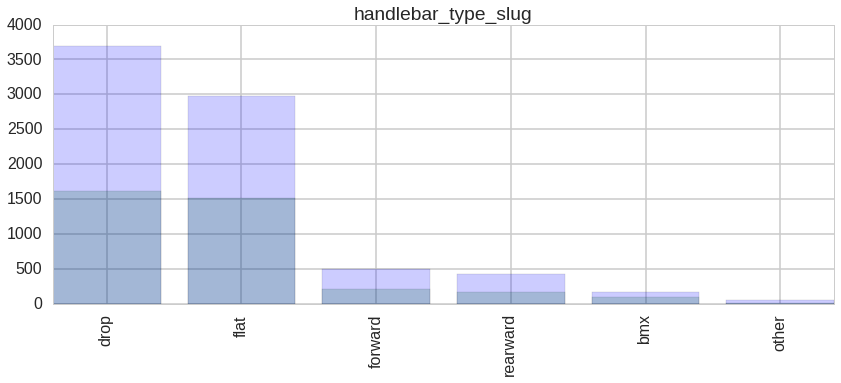

In [38]:
ax = plotDictionary ( 
    dict (  df_clean.iloc[ np.where(df_clean.stolen == True)]['handlebar_type_slug'].value_counts()) 
    , topN = 20 
    , ax = None 
    , c = 'g'
    , columnName = 'handlebar_type_slug'
    , labelRotation = 90)

ax = plotDictionary ( 
    dict (  df_clean.iloc[ np.where(df_clean.stolen == False)]['handlebar_type_slug'].value_counts()) 
    , topN = 20 
    , ax = ax 
    , c = 'b'
    , columnName = 'handlebar_type_slug'
    , labelRotation = 90)

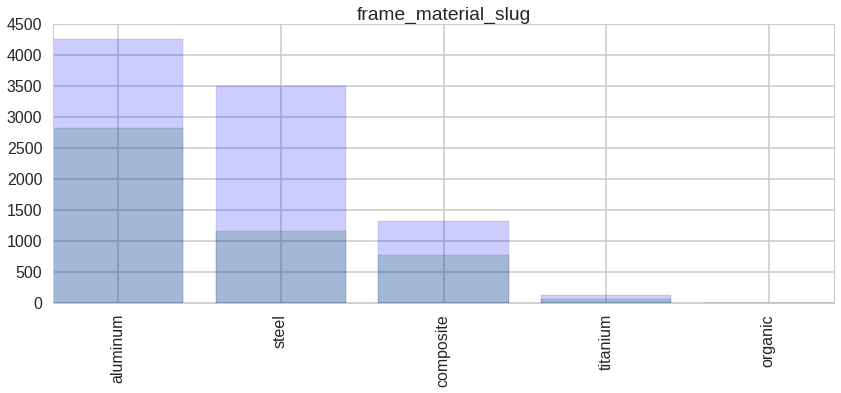

In [39]:
ax = plotDictionary ( 
    dict (  df_clean.iloc[ np.where(df_clean.stolen == True)]['frame_material_slug'].value_counts()) 
    , topN = 20 
    , ax = None 
    , c = 'g'
    , columnName = 'frame_material_slug'
    , labelRotation = 90)

ax = plotDictionary ( 
    dict (  df_clean.iloc[ np.where(df_clean.stolen == False)]['frame_material_slug'].value_counts()) 
    , topN = 20 
    , ax = ax 
    , c = 'b'
    , columnName = 'frame_material_slug'
    , labelRotation = 90)

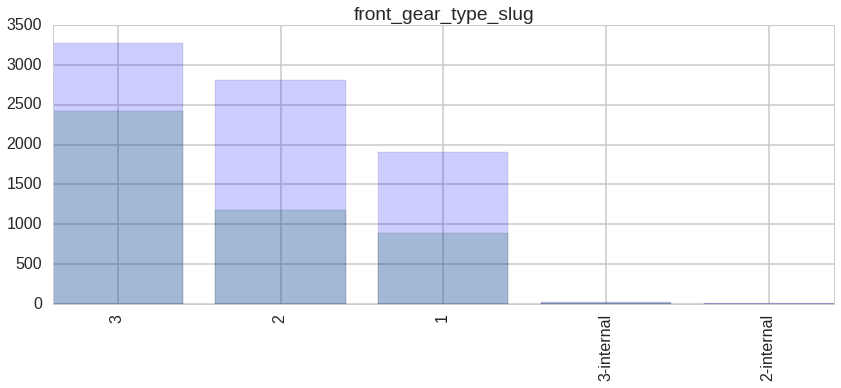

In [40]:
ax = plotDictionary ( 
    dict (  df_clean.iloc[ np.where(df_clean.stolen == True)]['front_gear_type_slug'].value_counts()) 
    , topN = 20 
    , ax = None 
    , c = 'g'
    , columnName = 'front_gear_type_slug'
    , labelRotation = 90)

ax = plotDictionary ( 
    dict (  df_clean.iloc[ np.where(df_clean.stolen == False)]['front_gear_type_slug'].value_counts()) 
    , topN = 20 
    , ax = ax 
    , c = 'b'
    , columnName = 'front_gear_type_slug'
    , labelRotation = 90)

In [41]:
#ax = plotDictionary ( 
#    dict (  df_clean.iloc[ np.where(df_clean.stolen == True)]['locking_description'].value_counts()) 
#    , topN = 20 
#    , ax = None 
#    , c = 'g'
#    , columnName = 'locking_description'
#    , labelRotation = 90)


In [42]:
#ax = plotDictionary ( 
#    dict (  df_clean.iloc[ np.where(df_clean.stolen == True)]['lock_defeat_description'].value_counts()) 
#    , topN = 20 
#    , ax = None 
#    , c = 'g'
#    , columnName = 'locking_description'
#    , labelRotation = 90)


/home/anusha/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


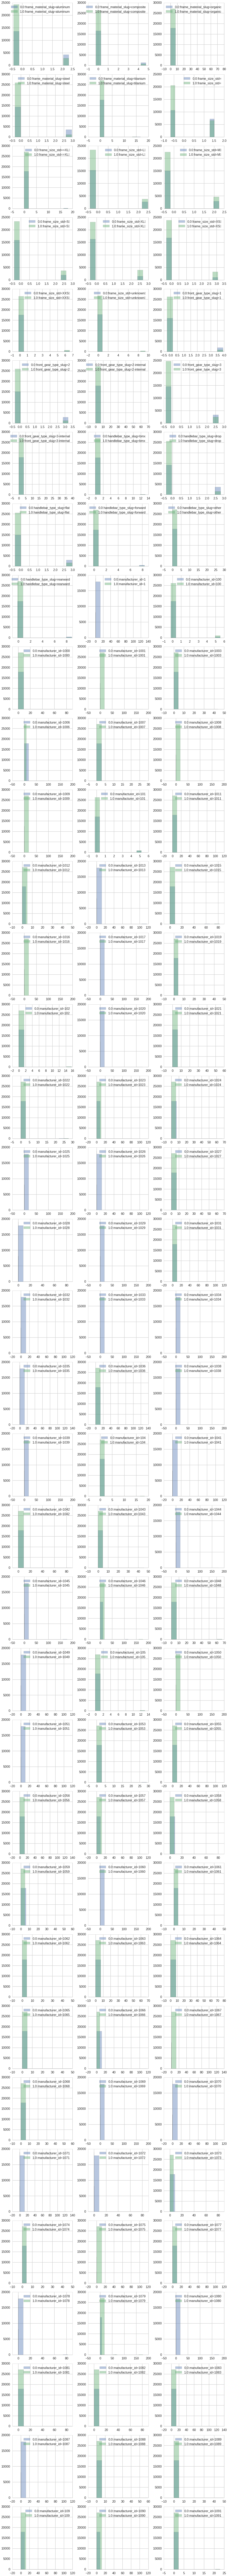

In [43]:
dfgb=finalDataDF.groupby('stolen')
fig, axes = plt.subplots(nrows=36, ncols=3, figsize=(16, 180), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), features ):
    for k, v in dfgb[p]:
        v.hist(ax=ax, alpha=0.4, label=str(k)+":"+v.name)
        ax.legend()

In [45]:
from sklearn.tree import DecisionTreeClassifier
clfdt=DecisionTreeClassifier()
clfdt, Xtrain, ytrain, Xtest, ytest  = do_classify(clfdt, {"max_depth": range(1,10,1)}, finalDataDF, features, 'stolen', 1, mask=mask)

using mask
BEST {'max_depth': 9} 0.775407858821 [mean: 0.75021, std: 0.03822, params: {'max_depth': 1}, mean: 0.77154, std: 0.05162, params: {'max_depth': 2}, mean: 0.77274, std: 0.05920, params: {'max_depth': 3}, mean: 0.75052, std: 0.03618, params: {'max_depth': 4}, mean: 0.75513, std: 0.03528, params: {'max_depth': 5}, mean: 0.77055, std: 0.04822, params: {'max_depth': 6}, mean: 0.76906, std: 0.04815, params: {'max_depth': 7}, mean: 0.76982, std: 0.05076, params: {'max_depth': 8}, mean: 0.77541, std: 0.04220, params: {'max_depth': 9}]
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.80
[[4146 1283]
 [1477 6597]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [47]:

clfdt, Xtrain, ytrain, Xtest, ytest  = do_classify(clfdt, {"max_depth": range(1,10,1)}, finalDFPCA, columnsAfterPCA, 'stolen', 1, mask=mask)

using mask
BEST {'max_depth': 9} 0.761791404812 [mean: 0.70926, std: 0.06902, params: {'max_depth': 1}, mean: 0.70495, std: 0.07045, params: {'max_depth': 2}, mean: 0.73472, std: 0.06590, params: {'max_depth': 3}, mean: 0.74275, std: 0.06706, params: {'max_depth': 4}, mean: 0.74148, std: 0.07203, params: {'max_depth': 5}, mean: 0.75468, std: 0.06770, params: {'max_depth': 6}, mean: 0.75452, std: 0.05594, params: {'max_depth': 7}, mean: 0.75963, std: 0.06216, params: {'max_depth': 8}, mean: 0.76179, std: 0.06192, params: {'max_depth': 9}]
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.78
[[4214 1215]
 [1791 6283]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [48]:
parameters = {"n_estimators": range(1, 101, 5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDataDF, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 66} 0.779787976893 [mean: 0.74668, std: 0.04294, params: {'n_estimators': 1}, mean: 0.77242, std: 0.05418, params: {'n_estimators': 6}, mean: 0.77290, std: 0.05067, params: {'n_estimators': 11}, mean: 0.77401, std: 0.05301, params: {'n_estimators': 16}, mean: 0.77357, std: 0.05056, params: {'n_estimators': 21}, mean: 0.77699, std: 0.05356, params: {'n_estimators': 26}, mean: 0.77677, std: 0.05350, params: {'n_estimators': 31}, mean: 0.77763, std: 0.05383, params: {'n_estimators': 36}, mean: 0.77687, std: 0.05314, params: {'n_estimators': 41}, mean: 0.77639, std: 0.05393, params: {'n_estimators': 46}, mean: 0.77652, std: 0.05368, params: {'n_estimators': 51}, mean: 0.77738, std: 0.05449, params: {'n_estimators': 56}, mean: 0.77795, std: 0.05307, params: {'n_estimators': 61}, mean: 0.77979, std: 0.05388, params: {'n_estimators': 66}, mean: 0.77979, std: 0.05207, params: {'n_estimators': 71}, mean: 0.77950, std: 0.05311, params: {'n_estimators': 76}, mean: 0.77899, s

In [49]:
parameters = {"n_estimators": range(60, 73, 3) , "max_depth" : range ( 1, 41 , 5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDataDF, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 69, 'max_depth': 36} 0.786961213737 [mean: 0.60468, std: 0.00003, params: {'n_estimators': 60, 'max_depth': 1}, mean: 0.60468, std: 0.00003, params: {'n_estimators': 63, 'max_depth': 1}, mean: 0.60468, std: 0.00003, params: {'n_estimators': 66, 'max_depth': 1}, mean: 0.60468, std: 0.00003, params: {'n_estimators': 69, 'max_depth': 1}, mean: 0.60468, std: 0.00003, params: {'n_estimators': 72, 'max_depth': 1}, mean: 0.68225, std: 0.02559, params: {'n_estimators': 60, 'max_depth': 6}, mean: 0.68025, std: 0.01900, params: {'n_estimators': 63, 'max_depth': 6}, mean: 0.68031, std: 0.01946, params: {'n_estimators': 66, 'max_depth': 6}, mean: 0.68082, std: 0.01950, params: {'n_estimators': 69, 'max_depth': 6}, mean: 0.67955, std: 0.01974, params: {'n_estimators': 72, 'max_depth': 6}, mean: 0.71904, std: 0.05057, params: {'n_estimators': 60, 'max_depth': 11}, mean: 0.71355, std: 0.04374, params: {'n_estimators': 63, 'max_depth': 11}, mean: 0.71751, std: 0.04468, params: {'

In [52]:
parameters = {"n_estimators": [69],  "max_depth" : range( 25, 76 , 5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDataDF, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 69, 'max_depth': 30} 0.788484733067 [mean: 0.78477, std: 0.05268, params: {'n_estimators': 69, 'max_depth': 25}, mean: 0.78848, std: 0.05370, params: {'n_estimators': 69, 'max_depth': 30}, mean: 0.78668, std: 0.05230, params: {'n_estimators': 69, 'max_depth': 35}, mean: 0.78680, std: 0.05376, params: {'n_estimators': 69, 'max_depth': 40}, mean: 0.78798, std: 0.05344, params: {'n_estimators': 69, 'max_depth': 45}, mean: 0.78706, std: 0.05356, params: {'n_estimators': 69, 'max_depth': 50}, mean: 0.78623, std: 0.05345, params: {'n_estimators': 69, 'max_depth': 55}, mean: 0.78661, std: 0.05266, params: {'n_estimators': 69, 'max_depth': 60}, mean: 0.78522, std: 0.05266, params: {'n_estimators': 69, 'max_depth': 65}, mean: 0.78423, std: 0.05248, params: {'n_estimators': 69, 'max_depth': 70}, mean: 0.78480, std: 0.05242, params: {'n_estimators': 69, 'max_depth': 75}]
############# based on standard predict ################
Accuracy on training data: 0.91
Accuracy on test

In [54]:
parameters = {"n_estimators": [69],  "max_depth" : [30], "min_samples_split": range(2,100,5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDataDF, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30} 0.787056433695 [mean: 0.78566, std: 0.05412, params: {'min_samples_split': 2, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78652, std: 0.05640, params: {'min_samples_split': 7, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78617, std: 0.05830, params: {'min_samples_split': 12, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78626, std: 0.05751, params: {'min_samples_split': 17, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78477, std: 0.05748, params: {'min_samples_split': 22, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78706, std: 0.05922, params: {'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78499, std: 0.05893, params: {'min_samples_split': 32, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78477, std: 0.05724, params: {'min_samples_split': 37, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78509, std: 0.05923, params: {'min_samples_split': 42, 'n_estimators': 69, 'max_depth': 30}, mean: 0.7

In [56]:
parameters = {"n_estimators": [69],  "max_depth" : [30], "min_samples_split": [27], "max_features" : range(5, 100, 5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDataDF, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'max_features': 65, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30} 0.791119151908 [mean: 0.68549, std: 0.02617, params: {'max_features': 5, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.75265, std: 0.03930, params: {'max_features': 10, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.77265, std: 0.05218, params: {'max_features': 15, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78020, std: 0.05926, params: {'max_features': 20, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78401, std: 0.05787, params: {'max_features': 25, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78674, std: 0.05988, params: {'max_features': 30, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78623, std: 0.05870, params: {'max_features': 35, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.78791, std: 0.05965, params: {'max_feature

In [57]:
signi_features = zip(features, clfForest.feature_importances_)
signi_features = pd.DataFrame(signi_features, columns = ["features", "importance"])
signi_features.sort(columns = ["importance"], ascending = False, inplace = True)
signi_features

/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


features    importance
668                           year  3.818800e-01
3        frame_material_slug=steel  6.371952e-02
20        handlebar_type_slug=drop  5.047216e-02
5                  frame_size_std=  4.688548e-02
0     frame_material_slug=aluminum  3.757965e-02
15          front_gear_type_slug=2  2.747130e-02
21        handlebar_type_slug=flat  2.380530e-02
17          front_gear_type_slug=3  2.377596e-02
14          front_gear_type_slug=1  2.067275e-02
643         rear_gear_type_slug=10  1.446680e-02
663          rear_gear_type_slug=9  1.065601e-02
1    frame_material_slug=composite  1.048303e-02
10             frame_size_std=XL\r  1.026245e-02
670                          black  1.019297e-02
503             manufacturer_id=47  7.584622e-03
385            manufacturer_id=201  6.904593e-03
34             manufacturer_id=101  6.726813e-03
11             frame_size_std=XS\r  6.401797e-03
667               rear_tire_narrow  6.357528e-03
454            manufacturer_id=324  6.227132e-03
382            manufacturer_id=196  5.968978e-03
361            manufacturer_id=153  5.492948e-03
661          rear_gear_type_slug=8  5.466442e-03
705                          white  5.393231e-03
659          rear_gear_type_slug=7  5.348896e-03
9               frame_size_std=S\r  4.963445e-03
446            manufacturer_id=307  4.874013e-03
641          rear_gear_type_slug=1  4.676510e-03
8               frame_size_std=M\r  4.648241e-03
671                           blue  4.511156e-03
..                             ...           ...
365            manufacturer_id=164  2.214025e-07
557            manufacturer_id=820  2.122830e-07
233           manufacturer_id=1221  2.057409e-07
28            manufacturer_id=1001  1.973007e-07
329           manufacturer_id=1379  1.402575e-07
69            manufacturer_id=1049  1.358435e-07
59            manufacturer_id=1038  1.247823e-07
526            manufacturer_id=616  1.173548e-07
553              manufacturer_id=8  1.160438e-07
573             manufacturer_id=90  9.795326e-08
336           manufacturer_id=1386  7.345623e-08
402            manufacturer_id=226  4.627163e-08
445            manufacturer_id=306  1.715339e-08
532            manufacturer_id=643  1.252362e-08
25               manufacturer_id=1  5.850293e-09
341           manufacturer_id=1391  2.667770e-09
310           manufacturer_id=1352  1.529678e-09
149           manufacturer_id=1134  0.000000e+00
243           manufacturer_id=1233  0.000000e+00
343           manufacturer_id=1393  0.000000e+00
88            manufacturer_id=1069  0.000000e+00
443            manufacturer_id=300  0.000000e+00
429            manufacturer_id=280  0.000000e+00
232           manufacturer_id=1220  0.000000e+00
60            manufacturer_id=1039  0.000000e+00
247           manufacturer_id=1240  0.000000e+00
166           manufacturer_id=1151  0.000000e+00
432            manufacturer_id=287  0.000000e+00
322           manufacturer_id=1369  0.000000e+00
52            manufacturer_id=1029  0.000000e+00

[707 rows x 2 columns]

In [58]:
parameters = {"n_estimators": [69],  "max_depth" : [30], "min_samples_split": [27], "max_features" : range(5, 100, 5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDFPCA, columnsAfterPCA, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'max_features': 70, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30} 0.772805179966 [mean: 0.76636, std: 0.06162, params: {'max_features': 5, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.76877, std: 0.06290, params: {'max_features': 10, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.77141, std: 0.06295, params: {'max_features': 15, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.76941, std: 0.06480, params: {'max_features': 20, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.77150, std: 0.06550, params: {'max_features': 25, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.77065, std: 0.06359, params: {'max_features': 30, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.77147, std: 0.06491, params: {'max_features': 35, 'min_samples_split': 27, 'n_estimators': 69, 'max_depth': 30}, mean: 0.77112, std: 0.06449, params: {'max_feature